In [1]:
from google.colab import drive  # to mount Drive to Colab notebook
import csv
import time
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# Connect Google Drive to Colab
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [6]:
import joblib
%time X1_train = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_X1_train.joblib')
%time X1_test = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_X1_test.joblib')
%time y1_train = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_y1_train.joblib')
%time y1_test = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_y1_test.joblib')

CPU times: user 5.65 s, sys: 215 ms, total: 5.87 s
Wall time: 6.62 s
CPU times: user 5.88 s, sys: 218 ms, total: 6.1 s
Wall time: 6.81 s
CPU times: user 11.5 ms, sys: 2.07 ms, total: 13.5 ms
Wall time: 695 ms
CPU times: user 5.13 ms, sys: 6 ms, total: 11.1 ms
Wall time: 658 ms


In [7]:
modelo1 = KNeighborsClassifier(n_neighbors=2,algorithm='kd_tree')

In [8]:
%time modelo1 = modelo1.fit(X1_train,y1_train)

CPU times: user 1.65 s, sys: 10.9 ms, total: 1.66 s
Wall time: 1.66 s


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")


In [9]:
joblib.dump(modelo1, '/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/modelos/modeloKNN_m1.joblib')

['/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/modelos/modeloKNN_m1.joblib']

In [ ]:
import joblib
%time modelo1 = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/modelos/modeloKNN_m1.joblib')

In [10]:
%time predictions1 = modelo1.predict(X1_test)

CPU times: user 28.1 s, sys: 872 ms, total: 28.9 s
Wall time: 28.8 s


In [ ]:
def guardarPredicciones(dataframe,name):
  step = 600
  iteraciones = int(dataframe.shape[0]/step)
  resto = int(dataframe.shape[0]%step)
  print(f'N iteraciones: {iteraciones}')
  
  for i in range(20,iteraciones):
    print(f'iteracion: {str(i)}')
    predictions1 = modelo3.predict(dataframe[i*step:(i+1)*step])
    joblib.dump(predictions1, '/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/modelos/predicciones knn/'+name+'/'+name+'p'+str(i)+'.joblib')
    del predictions1
  print(f'iteracion final: {str(iteraciones)}')
  predictions1 = modelo3.predict(dataframe[iteraciones*step:(iteraciones*step)+resto])
  joblib.dump(predictions1, '/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/modelos/predicciones knn/'+name+'/'+name+'p'+str(iteraciones)+'.joblib')
  del predictions1

In [ ]:
from sklearn.externals import joblib
%time f = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/modelos/predicciones knn/X1_test/X1_testp0.joblib')
%time f1 = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/modelos/predicciones knn/X1_test/X1_testp1.joblib')

CPU times: user 1.35 ms, sys: 22 µs, total: 1.37 ms
Wall time: 2.09 ms
CPU times: user 1.91 ms, sys: 58 µs, total: 1.97 ms
Wall time: 403 ms


In [ ]:
fa = np.empty(0)
f2 = np.concatenate((fa, f), 0)
f2.shape

(600,)

In [ ]:
def concatenarFrames(dataframe,name):
  step = 600
  iteraciones = int(dataframe.shape[0]/step)
  resto = int(dataframe.shape[0]%step)
  print(f'N iteraciones: {iteraciones}')
  f = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/modelos/predicciones knn/'+name+'/'+name+'p0.joblib')
  for i in range(1,(iteraciones+1)):
    print(f'iteracion: {str(i)}')
    f1 = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/modelos/predicciones knn/'+name+'/'+name+'p'+str(i)+'.joblib')
    f = np.concatenate((f,f1),0)
  return f    



In [ ]:
guardarPredicciones(X1_test,"X1_test")

N iteraciones: 52
iteracion: 51
iteracion final: 52


In [ ]:
predictions1 = concatenarFrames(X1_test,"X1_test")

N iteraciones: 52
iteracion: 1
iteracion: 2
iteracion: 3
iteracion: 4
iteracion: 5
iteracion: 6
iteracion: 7
iteracion: 8
iteracion: 9
iteracion: 10
iteracion: 11
iteracion: 12
iteracion: 13
iteracion: 14
iteracion: 15
iteracion: 16
iteracion: 17
iteracion: 18
iteracion: 19
iteracion: 20
iteracion: 21
iteracion: 22
iteracion: 23
iteracion: 24
iteracion: 25
iteracion: 26
iteracion: 27
iteracion: 28
iteracion: 29
iteracion: 30
iteracion: 31
iteracion: 32
iteracion: 33
iteracion: 34
iteracion: 35
iteracion: 36
iteracion: 37
iteracion: 38
iteracion: 39
iteracion: 40
iteracion: 41
iteracion: 42
iteracion: 43
iteracion: 44
iteracion: 45
iteracion: 46
iteracion: 47
iteracion: 48
iteracion: 49
iteracion: 50
iteracion: 51
iteracion: 52


In [ ]:
y1_test.shape

(31529,)

In [ ]:
predictions1.shape

(31529,)

In [11]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
res2 = confusion_matrix(y1_test, predictions1)
print(f"acc: {accuracy_score(y1_test,predictions1)}")
print(f"precision: {precision_score(y1_test,predictions1,average='macro')}")
print(f"recall: {recall_score(y1_test,predictions1,average='macro')}")
print(f"f1: {f1_score(y1_test,predictions1,average='micro')}")

acc: 0.8797932062545593
precision: 0.9095312232853217
recall: 0.8552034649065716
f1: 0.8797932062545593


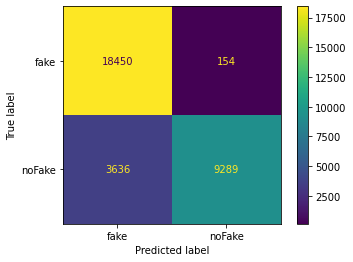

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
confusion_display = ConfusionMatrixDisplay(res2,display_labels=['fake','noFake']).plot(values_format='d')

## Muestra 2


In [13]:
import joblib
%time X2_train = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_X2_train.joblib')
%time X2_test = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_X2_test.joblib')
#%time X1_val = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_X1_val.joblib')
#%time y1_val = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_y1_val.joblib')
%time y2_train = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_y2_train.joblib')
%time y2_test = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_y2_test.joblib')

CPU times: user 5.61 s, sys: 196 ms, total: 5.8 s
Wall time: 6.37 s
CPU times: user 5.56 s, sys: 216 ms, total: 5.77 s
Wall time: 6.26 s
CPU times: user 6.99 ms, sys: 40.6 ms, total: 47.6 ms
Wall time: 791 ms
CPU times: user 8.4 ms, sys: 4.95 ms, total: 13.3 ms
Wall time: 691 ms


In [14]:
modelo2 = KNeighborsClassifier(n_neighbors=2,algorithm='kd_tree')

In [15]:
%time modelo2.fit(X2_train,y2_train)


CPU times: user 1.62 s, sys: 15.5 ms, total: 1.63 s
Wall time: 1.62 s


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")


KNeighborsClassifier(algorithm='kd_tree', n_neighbors=2)

In [16]:
joblib.dump(modelo2, '/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/modelos/modeloKNN_m2.joblib')

['/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/modelos/modeloKNN_m2.joblib']

In [ ]:
guardarPredicciones(X2_test,"X2_test")

CPU times: user 5h 18min 59s, sys: 5.18 s, total: 5h 19min 4s
Wall time: 5h 19min 5s


In [ ]:
predictions2 = concatenarFrames(X2_test,"X2_test")

N iteraciones: 52
iteracion: 1
iteracion: 2
iteracion: 3
iteracion: 4
iteracion: 5
iteracion: 6
iteracion: 7
iteracion: 8
iteracion: 9
iteracion: 10
iteracion: 11
iteracion: 12
iteracion: 13
iteracion: 14
iteracion: 15
iteracion: 16
iteracion: 17
iteracion: 18
iteracion: 19
iteracion: 20
iteracion: 21
iteracion: 22
iteracion: 23
iteracion: 24
iteracion: 25
iteracion: 26
iteracion: 27
iteracion: 28
iteracion: 29
iteracion: 30
iteracion: 31
iteracion: 32
iteracion: 33
iteracion: 34
iteracion: 35
iteracion: 36
iteracion: 37
iteracion: 38
iteracion: 39
iteracion: 40
iteracion: 41
iteracion: 42
iteracion: 43
iteracion: 44
iteracion: 45
iteracion: 46
iteracion: 47
iteracion: 48
iteracion: 49
iteracion: 50
iteracion: 51
iteracion: 52


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
res2 = confusion_matrix(y2_test, predictions2)
print(f"acc: {accuracy_score(y2_test,predictions2)}")
print(f"precision: {precision_score(y2_test,predictions2,average='macro')}")
print(f"recall: {recall_score(y2_test,predictions2,average='macro')}")
print(f"f1: {f1_score(y2_test,predictions2,average='micro')}")

acc: 0.8856291033651559
precision: 0.9141048491850157
recall: 0.8620144250503313
f1: 0.8856291033651559


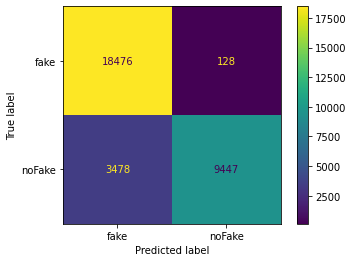

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
confusion_display = ConfusionMatrixDisplay(res2,display_labels=['fake','noFake']).plot(values_format='d')

## Muestra 3


In [17]:
import joblib
%time X3_train = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_X3_train.joblib')
%time X3_test = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_X3_test.joblib')
#%time X1_val = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_X1_val.joblib')
#%time y1_val = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_y1_val.joblib')
%time y3_train = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_y3_train.joblib')
%time y3_test = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_y3_test.joblib')

CPU times: user 5.45 s, sys: 192 ms, total: 5.64 s
Wall time: 6.22 s
CPU times: user 5.55 s, sys: 193 ms, total: 5.74 s
Wall time: 6.19 s
CPU times: user 12 ms, sys: 34.5 ms, total: 46.5 ms
Wall time: 778 ms
CPU times: user 6.83 ms, sys: 7.08 ms, total: 13.9 ms
Wall time: 694 ms


In [18]:
modelo3 = KNeighborsClassifier(n_neighbors=2)

In [19]:
%time modelo3.fit(X3_train,y3_train)


CPU times: user 1.8 s, sys: 16.2 ms, total: 1.82 s
Wall time: 1.81 s


KNeighborsClassifier(n_neighbors=2)

In [20]:
joblib.dump(modelo3, '/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/modelos/modeloKNN_m3.joblib')

['/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/modelos/modeloKNN_m3.joblib']

In [ ]:
from sklearn.externals import joblib
%time modelo3 = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/modelos/modeloKNN_m3.joblib')

In [ ]:
guardarPredicciones(X3_test,"X3_test")

N iteraciones: 52
iteracion: 20
iteracion: 21
iteracion: 22
iteracion: 23
iteracion: 24
iteracion: 25
iteracion: 26
iteracion: 27
iteracion: 28
iteracion: 29
iteracion: 30
iteracion: 31
iteracion: 32
iteracion: 33
iteracion: 34
iteracion: 35
iteracion: 36
iteracion: 37
iteracion: 38
iteracion: 39
iteracion: 40
iteracion: 41
iteracion: 42
iteracion: 43
iteracion: 44
iteracion: 45
iteracion: 46
iteracion: 47
iteracion: 48
iteracion: 49
iteracion: 50
iteracion: 51
iteracion final: 52


In [ ]:
predictions3 = concatenarFrames(X3_test,"X3_test")

N iteraciones: 52
iteracion: 1
iteracion: 2
iteracion: 3
iteracion: 4
iteracion: 5
iteracion: 6
iteracion: 7
iteracion: 8
iteracion: 9
iteracion: 10
iteracion: 11
iteracion: 12
iteracion: 13
iteracion: 14
iteracion: 15
iteracion: 16
iteracion: 17
iteracion: 18
iteracion: 19
iteracion: 20
iteracion: 21
iteracion: 22
iteracion: 23
iteracion: 24
iteracion: 25
iteracion: 26
iteracion: 27
iteracion: 28
iteracion: 29
iteracion: 30
iteracion: 31
iteracion: 32
iteracion: 33
iteracion: 34
iteracion: 35
iteracion: 36
iteracion: 37
iteracion: 38
iteracion: 39
iteracion: 40
iteracion: 41
iteracion: 42
iteracion: 43
iteracion: 44
iteracion: 45
iteracion: 46
iteracion: 47
iteracion: 48
iteracion: 49
iteracion: 50
iteracion: 51
iteracion: 52


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
res3 = confusion_matrix(y3_test, predictions3)
print(f"acc: {accuracy_score(y3_test,predictions3)}")
print(f"precision: {precision_score(y3_test,predictions3,average='macro')}")
print(f"recall: {recall_score(y3_test,predictions3,average='macro')}")
print(f"f1: {f1_score(y3_test,predictions3,average='micro')}")

acc: 0.8813790478606996
precision: 0.9122247600443212
recall: 0.8565826882761012
f1: 0.8813790478606996


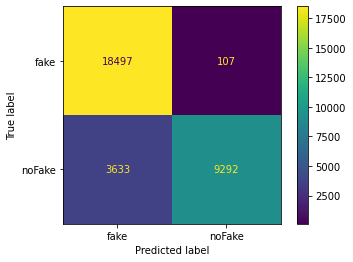

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
confusion_display = ConfusionMatrixDisplay(res3,display_labels=['fake','noFake']).plot(values_format='d')

In [ ]:
modelo3.get_params

<bound method BaseEstimator.get_params of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')>

# Modelo 1 Aplicado a otras muestras


In [21]:
import joblib
modelo1 = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/modelos/modeloKNN_m1.joblib')


In [22]:
%time X1_test = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_X1_test.joblib')
%time y1_test = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_y1_test.joblib')
%time X2_test = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_X2_test.joblib')
%time y2_test = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_y2_test.joblib')
%time X3_test = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_X3_test.joblib')
%time y3_test = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_y3_test.joblib')

CPU times: user 5.71 s, sys: 231 ms, total: 5.94 s
Wall time: 5.73 s
CPU times: user 2.63 ms, sys: 2.02 ms, total: 4.65 ms
Wall time: 5.04 ms
CPU times: user 5.31 s, sys: 218 ms, total: 5.53 s
Wall time: 5.29 s
CPU times: user 1.92 ms, sys: 3.04 ms, total: 4.96 ms
Wall time: 5.18 ms
CPU times: user 6.14 s, sys: 201 ms, total: 6.34 s
Wall time: 6.15 s
CPU times: user 6.12 ms, sys: 0 ns, total: 6.12 ms
Wall time: 5.91 ms


In [23]:
%time predictions1 = modelo1.predict(X1_test)
%time predictions2 = modelo1.predict(X2_test)
%time predictions3 = modelo1.predict(X3_test)

CPU times: user 28.5 s, sys: 303 ms, total: 28.8 s
Wall time: 28.7 s
CPU times: user 28.5 s, sys: 278 ms, total: 28.8 s
Wall time: 28.6 s
CPU times: user 27.7 s, sys: 301 ms, total: 28 s
Wall time: 27.9 s


In [24]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
res1 = confusion_matrix(y1_test, predictions1)
res2 = confusion_matrix(y2_test, predictions2)
res3 = confusion_matrix(y3_test, predictions3)
print(f"acc: {round(accuracy_score(y1_test,predictions1),3)} | {round(accuracy_score(y2_test,predictions2),3)} | {round(accuracy_score(y3_test,predictions3),3)}")
print(f"precision: {round(precision_score(y1_test,predictions1,average='macro'),3)} | {round(precision_score(y2_test,predictions2,average='macro'),3)} | {round(precision_score(y3_test,predictions3,average='macro'),3)} ")
print(f"recall: {round(recall_score(y1_test,predictions1,average='macro'),3)} | {round(recall_score(y2_test,predictions2,average='macro'),3)} | {round(recall_score(y3_test,predictions3,average='macro'),3)}  ")
print(f"f1: {round(f1_score(y1_test,predictions1,average='micro'),3)} | {round(f1_score(y2_test,predictions2,average='micro'),3)} | {round(f1_score(y3_test,predictions3,average='micro'),3)}  ")

acc: 0.88 | 0.897 | 0.896
precision: 0.91 | 0.922 | 0.921 
recall: 0.855 | 0.876 | 0.875  
f1: 0.88 | 0.897 | 0.896  


# Modelo 2 Aplicado a otras muestras


In [29]:
modelo2 = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/modelos/modeloKNN_m2.joblib')


In [30]:
%time predictions1 = modelo2.predict(X1_test)
%time predictions2 = modelo2.predict(X2_test)
%time predictions3 = modelo2.predict(X3_test)

CPU times: user 27.1 s, sys: 251 ms, total: 27.3 s
Wall time: 27.2 s
CPU times: user 27.2 s, sys: 300 ms, total: 27.5 s
Wall time: 27.3 s
CPU times: user 27.2 s, sys: 271 ms, total: 27.4 s
Wall time: 27.3 s


In [31]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
res1 = confusion_matrix(y1_test, predictions1)
res2 = confusion_matrix(y2_test, predictions2)
res3 = confusion_matrix(y3_test, predictions3)
print(f"acc: {round(accuracy_score(y1_test,predictions1),3)} | {round(accuracy_score(y2_test,predictions2),3)} | {round(accuracy_score(y3_test,predictions3),3)}")
print(f"precision: {round(precision_score(y1_test,predictions1,average='macro'),3)} | {round(precision_score(y2_test,predictions2,average='macro'),3)} | {round(precision_score(y3_test,predictions3,average='macro'),3)} ")
print(f"recall: {round(recall_score(y1_test,predictions1,average='macro'),3)} | {round(recall_score(y2_test,predictions2,average='macro'),3)} | {round(recall_score(y3_test,predictions3,average='macro'),3)}  ")
print(f"f1: {round(f1_score(y1_test,predictions1,average='micro'),3)} | {round(f1_score(y2_test,predictions2,average='micro'),3)} | {round(f1_score(y3_test,predictions3,average='micro'),3)}  ")

acc: 0.894 | 0.885 | 0.897
precision: 0.92 | 0.914 | 0.922 
recall: 0.872 | 0.861 | 0.876  
f1: 0.894 | 0.885 | 0.897  


# Modelo 3 Aplicado a otras muestras


In [32]:
modelo3 = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/modelos/modeloKNN_m3.joblib')


In [33]:
%time predictions1 = modelo3.predict(X1_test)
%time predictions2 = modelo3.predict(X2_test)
%time predictions3 = modelo3.predict(X3_test)

CPU times: user 27.1 s, sys: 409 ms, total: 27.5 s
Wall time: 27.4 s
CPU times: user 27.3 s, sys: 398 ms, total: 27.7 s
Wall time: 27.5 s
CPU times: user 27.2 s, sys: 367 ms, total: 27.5 s
Wall time: 27.4 s


In [34]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
res1 = confusion_matrix(y1_test, predictions1)
res2 = confusion_matrix(y2_test, predictions2)
res3 = confusion_matrix(y3_test, predictions3)
print(f"acc: {round(accuracy_score(y1_test,predictions1),3)} | {round(accuracy_score(y2_test,predictions2),3)} | {round(accuracy_score(y3_test,predictions3),3)}")
print(f"precision: {round(precision_score(y1_test,predictions1,average='macro'),3)} | {round(precision_score(y2_test,predictions2,average='macro'),3)} | {round(precision_score(y3_test,predictions3,average='macro'),3)} ")
print(f"recall: {round(recall_score(y1_test,predictions1,average='macro'),3)} | {round(recall_score(y2_test,predictions2,average='macro'),3)} | {round(recall_score(y3_test,predictions3,average='macro'),3)}  ")
print(f"f1: {round(f1_score(y1_test,predictions1,average='micro'),3)} | {round(f1_score(y2_test,predictions2,average='micro'),3)} | {round(f1_score(y3_test,predictions3,average='micro'),3)}  ")

acc: 0.895 | 0.898 | 0.881
precision: 0.921 | 0.923 | 0.912 
recall: 0.873 | 0.877 | 0.856  
f1: 0.895 | 0.898 | 0.881  
